# John Schueler
# NLP Program 3 
# Please use Google Colab, set runtime to 'GPU' or 'TPU' and High-RAM setting

**topics covered**:
 LSA, LDA, TextRank, stemming, lemmatising, counter, chunks, tokenisation, text cleaning, space functions, dropping punctuation, dropping stop words, token frequency, stopwords, digits, tfidf gensim, topic modelling, unneating lists, topic contribution, max topic calc, max proportion calc. and more

In [ ]:
# import packages, libraries
import pandas as pd
import numpy as np
import email
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import bigrams, trigrams
import string
import spacy
import collections
from collections import Counter, defaultdict
from itertools import chain


import pandas as pd
import email
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
import string
import spacy
import collections
from collections import Counter
from itertools import chain


from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

import pandas as pd
import numpy as np
import email 
import re 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.cluster import KMeans
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
import string 
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
import gensim
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models.nmf import Nmf
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from operator import itemgetter 
from sentence_transformers import SentenceTransformer



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hckyi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# laoding dataset
emails_full = pd.read_csv('articles.csv')



In [ ]:
#emails1 
#emails2 
#emails3 
emails1 = emails_full.sample(n = 1000, random_state = 10)
emails2 = emails_full.sample(n = 1000, random_state = 10)
emails3 = emails_full.sample(n = 1000, random_state = 10)

In [ ]:
 # The below cells represent my preferred method of text preprocessing and tokenization.
 # My other methods that I deemed less effective are at the end of my notebook. 

In [ ]:
# Extract message body
def body(messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get_payload())
    return column

# Apply it
emails1['body'] = body(emails1['body_text'])

In [ ]:
# dropping old column
emails1 = emails1.drop(['body_text'], axis=1)

In [ ]:
# cleaning text data
emails1['body2'] = emails1['body'].str.replace(r'\d', '', regex=True)

In [ ]:
# tokenizing
re_tokenizer = RegexpTokenizer("[\\w']+")
emails1['body_cleaned'] = emails1['body2'].apply(re_tokenizer.tokenize)

In [ ]:
# cleaning up punctuation, adding stop words, digits
punc = string.punctuation + '--' 
stopwords_nltk = nltk.corpus.stopwords.words('english')
stopwords_nltk.extend(['also', 'al', 'et', 'however', 'doi', 'https']) 
digits = string.digits 

emails1['body_cleaned'] = emails1['body_cleaned'].apply(lambda x: [word.lower() for word in x])
emails1['body_cleaned'] = emails1['body_cleaned'].apply(lambda x: [word for word in x if word not in digits]) 
emails1['body_cleaned'] = emails1['body_cleaned'].apply(lambda x: [word for word in x if word not in punc])
emails1['body_cleaned'] = emails1['body_cleaned'].apply(lambda x: [word for word in x if word not in stopwords_nltk])
emails1['body_cleaned'] = emails1['body_cleaned'].apply(lambda x: [word for word in x if len(word)>1]) # Drops single-letter tokens

In [ ]:
# finding frequency of tokens
counter = Counter()
emails1['body_cleaned'].map(counter.update)
most_freq = pd.DataFrame(counter.most_common()) # Or add number within parens to list only x most common
most_freq.columns = ['token', 'count']
most_freq.head(50)

,token,count
0,covid,12257
1,patients,9520
2,sars,7861
3,preprint,7804
4,cov,7663
5,cases,7625
6,data,6693
7,number,5523
8,time,5299
9,model,5055


In [ ]:
# create dictionary from tokens and freq
dictionary = Dictionary(emails1['body_cleaned'])

In [ ]:
#dictionary.filter_extremes(no_below=5, no_above=0.7)

In [ ]:
# for loop with dictionary
corpus = [dictionary.doc2bow(document)
          for document
          in emails1['body_cleaned']]

In [ ]:
# tfidf with gensim
tfidf_gensim = TfidfModel(corpus)
vectors_gensim = tfidf_gensim[corpus]

In [ ]:
# model with negative 
model_nmf = Nmf(vectors_gensim, num_topics = 10, id2word = dictionary, kappa = 0.1, eval_every = 10, random_state = 42)

In [ ]:
# occurences not in dataframe format
model_nmf.show_topics()

[(0,
  '0.003*"preprint" + 0.002*"medrxiv" + 0.002*"license" + 0.001*"model" + 0.001*"perpetuity" + 0.001*"ace" + 0.001*"granted" + 0.001*"display" + 0.001*"funder" + 0.001*"copyright"'),
 (1,
  '0.003*"preprint" + 0.002*"medrxiv" + 0.002*"license" + 0.001*"cov" + 0.001*"model" + 0.001*"ace" + 0.001*"patients" + 0.001*"perpetuity" + 0.001*"granted" + 0.001*"sars"'),
 (2,
  '0.003*"preprint" + 0.002*"medrxiv" + 0.002*"license" + 0.001*"patients" + 0.001*"ace" + 0.001*"perpetuity" + 0.001*"granted" + 0.001*"model" + 0.001*"cov" + 0.001*"funder"'),
 (3,
  '0.002*"preprint" + 0.002*"medrxiv" + 0.002*"license" + 0.001*"model" + 0.001*"patients" + 0.001*"cov" + 0.001*"perpetuity" + 0.001*"granted" + 0.001*"funder" + 0.001*"ncov"'),
 (4,
  '0.003*"preprint" + 0.002*"medrxiv" + 0.002*"license" + 0.001*"patients" + 0.001*"perpetuity" + 0.001*"cov" + 0.001*"model" + 0.001*"granted" + 0.001*"funder" + 0.001*"holder"'),
 (5,
  '0.003*"preprint" + 0.002*"medrxiv" + 0.002*"license" + 0.002*"model" +

In [ ]:
# b.
topics_nmf = pd.DataFrame(model_nmf.show_topics())
topics_nmf = topics_nmf[1].str.split('+', n = 10, expand = True)
topics_nmf = topics_nmf.replace(r'\d', '', regex=True)
topics_nmf = topics_nmf.replace(r'\*', '', regex=True)
topics_nmf = topics_nmf.replace(r'\"', '', regex=True)
topics_nmf = topics_nmf.replace(r'\.', '', regex=True)
topics_nmf.columns = ['word_1', 'word_2', 'word_3', 'word_4', 'word_5',
                      'word_6', 'word_7', 'word_8', 'word_9', 'word_10']
topics_nmf = topics_nmf.transpose()
topics_nmf.columns = ['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5',
                      'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10']

topics_nmf

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
word_1,preprint,preprint,preprint,preprint,preprint,preprint,preprint,preprint,preprint,preprint
word_2,medrxiv,medrxiv,medrxiv,medrxiv,medrxiv,medrxiv,medrxiv,medrxiv,medrxiv,medrxiv
word_3,license,license,license,license,license,license,license,license,license,license
word_4,model,cov,patients,model,patients,model,model,perpetuity,model,patients
word_5,perpetuity,model,ace,patients,perpetuity,patients,patients,model,patients,cov
word_6,ace,ace,perpetuity,cov,cov,cov,cov,granted,cov,model
word_7,granted,patients,granted,perpetuity,model,ace,ace,patients,perpetuity,sars
word_8,display,perpetuity,model,granted,granted,perpetuity,perpetuity,cov,granted,ncov
word_9,funder,granted,cov,funder,funder,granted,granted,funder,funder,perpetuity
word_10,copyright,sars,funder,ncov,holder,funder,sars,display,display,granted


In [ ]:
# create nmf data frame with occurence %
topic_contrib = pd.DataFrame(model_nmf[corpus])
topic_contrib.columns = ['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5',
                      'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10']
topic_contrib

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
0,"(0, 0.13808225586557688)","(1, 0.09830573651764135)","(2, 0.12106315765117186)","(3, 0.09194540658119608)","(4, 0.09690173601607469)","(5, 0.10100972573930411)","(6, 0.05484293329490177)","(7, 0.1376102028186894)","(8, 0.11140942767301644)","(9, 0.0488294178424273)"
1,"(0, 0.10193657059957816)","(1, 0.10187336082142336)","(2, 0.07198083669410327)","(3, 0.10813031645580316)","(4, 0.10939533506484472)","(5, 0.11703840289394801)","(6, 0.12524395697547072)","(7, 0.07006264243048695)","(8, 0.09435856268439202)","(9, 0.09998001537994952)"
2,"(0, 0.17253347965841379)","(1, 0.08662042138298427)","(2, 0.14186313085637903)","(3, 0.09241414216957514)","(4, 0.09110733358365669)","(5, 0.06763328947123898)","(6, 0.09099051895729371)","(7, 0.09498308723895077)","(8, 0.09029046401217207)","(9, 0.07156413266933548)"
3,"(0, 0.0932970033489288)","(1, 0.09762888381942886)","(2, 0.07925897979542043)","(3, 0.0891070966191499)","(4, 0.10048153223938229)","(5, 0.10877135997823788)","(6, 0.09595634382200982)","(7, 0.1141346643037789)","(8, 0.07485946684965823)","(9, 0.14650466922400485)"
4,"(0, 0.12161768330792785)","(1, 0.10560394889443578)","(2, 0.11278502330718733)","(3, 0.10797381517275102)","(4, 0.08348137193121133)","(5, 0.10256565743843311)","(6, 0.08700066151868956)","(7, 0.10686902507537056)","(8, 0.0744171649123324)","(9, 0.09768564844166093)"
...,...,...,...,...,...,...,...,...,...,...
995,"(0, 0.08702503902086962)","(1, 0.13672578210369324)","(2, 0.11841753566632376)","(3, 0.10489387358452242)","(4, 0.07451863138340409)","(5, 0.12393538816523743)","(6, 0.11138560999834558)","(7, 0.08888249141968425)","(8, 0.06869130007381986)","(9, 0.08552434858409974)"
996,"(0, 0.06881822553608129)","(1, 0.1384524092913613)","(2, 0.11446547507266572)","(3, 0.10759748874315835)","(4, 0.13288753679711957)","(5, 0.06941451368147969)","(6, 0.09035103167257078)","(7, 0.0851875366254623)","(8, 0.10020815766246653)","(9, 0.0926176249176346)"
997,"(0, 0.14042134568068562)","(1, 0.10546934547345779)","(2, 0.0862488746417886)","(3, 0.13490595249978038)","(4, 0.06374293377018866)","(5, 0.11405220738936132)","(6, 0.07385089535838303)","(7, 0.07841819190995715)","(8, 0.08947204010866204)","(9, 0.1134182131677355)"
998,"(0, 0.10060172244170537)","(1, 0.09482137071483336)","(2, 0.09847894965265326)","(3, 0.11186769248534846)","(4, 0.1290391461755062)","(5, 0.1042804212673821)","(6, 0.0856535062664721)","(7, 0.0875746621786521)","(8, 0.07629964359063918)","(9, 0.11138288522680781)"


In [ ]:
# unnesting function
def unnesting(df, explode, axis):
    if axis==1:
        idx = df.index.repeat(df[explode[0]].str.len())
        df1 = pd.concat([
            pd.DataFrame({x: np.concatenate(df[x].values)}) for x in explode], axis=1)
        df1.index = idx

        return df1.join(df.drop(explode, 1), how='left')
    else :
        df1 = pd.concat([
                         pd.DataFrame(df[x].tolist(), index=df.index).add_prefix(x) for x in explode], axis=1)
        return df1.join(df.drop(explode, 1), how='left')

In [ ]:
# unnesting lists
topic_contrib = unnesting(topic_contrib, ['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5',
                     'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10'], axis=0)
topic_contrib

,topic_10,topic_11,topic_20,topic_21,topic_30,topic_31,topic_40,topic_41,topic_50,topic_51,topic_60,topic_61,topic_70,topic_71,topic_80,topic_81,topic_90,topic_91,topic_100,topic_101
0,0,0.138082,1,0.098306,2,0.121063,3,0.091945,4,0.096902,5,0.101010,6,0.054843,7,0.137610,8,0.111409,9,0.048829
1,0,0.101937,1,0.101873,2,0.071981,3,0.108130,4,0.109395,5,0.117038,6,0.125244,7,0.070063,8,0.094359,9,0.099980
2,0,0.172533,1,0.086620,2,0.141863,3,0.092414,4,0.091107,5,0.067633,6,0.090991,7,0.094983,8,0.090290,9,0.071564
3,0,0.093297,1,0.097629,2,0.079259,3,0.089107,4,0.100482,5,0.108771,6,0.095956,7,0.114135,8,0.074859,9,0.146505
4,0,0.121618,1,0.105604,2,0.112785,3,0.107974,4,0.083481,5,0.102566,6,0.087001,7,0.106869,8,0.074417,9,0.097686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0.087025,1,0.136726,2,0.118418,3,0.104894,4,0.074519,5,0.123935,6,0.111386,7,0.088882,8,0.068691,9,0.085524
996,0,0.068818,1,0.138452,2,0.114465,3,0.107597,4,0.132888,5,0.069415,6,0.090351,7,0.085188,8,0.100208,9,0.092618
997,0,0.140421,1,0.105469,2,0.086249,3,0.134906,4,0.063743,5,0.114052,6,0.073851,7,0.078418,8,0.089472,9,0.113418
998,0,0.100602,1,0.094821,2,0.098479,3,0.111868,4,0.129039,5,0.104280,6,0.085654,7,0.087575,8,0.076300,9,0.111383


In [ ]:
# deleting unnecessary columns
del topic_contrib['topic_10']
del topic_contrib['topic_20']
del topic_contrib['topic_30']
del topic_contrib['topic_40']
del topic_contrib['topic_50']
del topic_contrib['topic_60']
del topic_contrib['topic_70']
del topic_contrib['topic_80']
del topic_contrib['topic_90']
del topic_contrib['topic_100']

In [ ]:
topic_contrib

,topic_11,topic_21,topic_31,topic_41,topic_51,topic_61,topic_71,topic_81,topic_91,topic_101
0,0.138082,0.098306,0.121063,0.091945,0.096902,0.101010,0.054843,0.137610,0.111409,0.048829
1,0.101937,0.101873,0.071981,0.108130,0.109395,0.117038,0.125244,0.070063,0.094359,0.099980
2,0.172533,0.086620,0.141863,0.092414,0.091107,0.067633,0.090991,0.094983,0.090290,0.071564
3,0.093297,0.097629,0.079259,0.089107,0.100482,0.108771,0.095956,0.114135,0.074859,0.146505
4,0.121618,0.105604,0.112785,0.107974,0.083481,0.102566,0.087001,0.106869,0.074417,0.097686
...,...,...,...,...,...,...,...,...,...,...
995,0.087025,0.136726,0.118418,0.104894,0.074519,0.123935,0.111386,0.088882,0.068691,0.085524
996,0.068818,0.138452,0.114465,0.107597,0.132888,0.069415,0.090351,0.085188,0.100208,0.092618
997,0.140421,0.105469,0.086249,0.134906,0.063743,0.114052,0.073851,0.078418,0.089472,0.113418
998,0.100602,0.094821,0.098479,0.111868,0.129039,0.104280,0.085654,0.087575,0.076300,0.111383


In [ ]:
# renaming columns
topic_contrib.columns = ['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5',
                      'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10']
topic_contrib

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
0,0.138082,0.098306,0.121063,0.091945,0.096902,0.101010,0.054843,0.137610,0.111409,0.048829
1,0.101937,0.101873,0.071981,0.108130,0.109395,0.117038,0.125244,0.070063,0.094359,0.099980
2,0.172533,0.086620,0.141863,0.092414,0.091107,0.067633,0.090991,0.094983,0.090290,0.071564
3,0.093297,0.097629,0.079259,0.089107,0.100482,0.108771,0.095956,0.114135,0.074859,0.146505
4,0.121618,0.105604,0.112785,0.107974,0.083481,0.102566,0.087001,0.106869,0.074417,0.097686
...,...,...,...,...,...,...,...,...,...,...
995,0.087025,0.136726,0.118418,0.104894,0.074519,0.123935,0.111386,0.088882,0.068691,0.085524
996,0.068818,0.138452,0.114465,0.107597,0.132888,0.069415,0.090351,0.085188,0.100208,0.092618
997,0.140421,0.105469,0.086249,0.134906,0.063743,0.114052,0.073851,0.078418,0.089472,0.113418
998,0.100602,0.094821,0.098479,0.111868,0.129039,0.104280,0.085654,0.087575,0.076300,0.111383


In [ ]:
#concatenating
emails_topics = pd.concat([emails1.reset_index(drop=True), topic_contrib], axis=1)
emails_topics

,Unnamed: 0,paper_id,source,title,abstract,authors,journal,publish_year,body,body2,...,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
0,841,6b96c2ef257f66c4eeb87ed65f06dff989703568,medrxiv,Study of Epidemiological Characteristics and I...,"After SARS-CoV-2 set foot in India, the Indian...",Archisman Mazumder; Mehak Arora; Vishwesh Bhar...,NaN,2020,"In December 2019, a cluster of patients with p...","In December , a cluster of patients with pneum...",...,0.138082,0.098306,0.121063,0.091945,0.096902,0.101010,0.054843,0.137610,0.111409,0.048829
1,956,afe457e80dfa89c356d2951d66c3a52c8e4edc70,Elsevier,SARS-CoV-2 and the testis: similarity with oth...,Abstract Since the start of the latest coronav...,"Cardona Maya, Walter D.; Du Plessis, Stefan S....",Reproductive BioMedicine Online,2020,S ince the novel coronavirus (SARS-CoV-2) outb...,S ince the novel coronavirus (SARS-CoV-) outbr...,...,0.101937,0.101873,0.071981,0.108130,0.109395,0.117038,0.125244,0.070063,0.094359,0.099980
2,544,95bd7b80fc057fe933c91325ec5d65dae385b3da,medrxiv,SIR-simulation of Corona pandemic dynamics in ...,"The SIR (susceptible-infected-removed) model, ...",Igor Nesteruk,NaN,2020,7697 199 All rights reserved. No reuse allowed...,All rights reserved. No reuse allowed withou...,...,0.172533,0.086620,0.141863,0.092414,0.091107,0.067633,0.090991,0.094983,0.090290,0.071564
3,173,19ff77e874c0706f794908e9b6878314671d385a,CZI,A distinct name is needed for the new coronavirus,NaN,"Jiang, Shibo; Shi, Zhengli; Shu, Yuelong; Song...",The Lancet,2020,the Coronavirus Study Group (CSG) of the Inter...,the Coronavirus Study Group (CSG) of the Inter...,...,0.093297,0.097629,0.079259,0.089107,0.100482,0.108771,0.095956,0.114135,0.074859,0.146505
4,759,d9bf11dd9fdf075a26144b7c816440092200b4f0,arxiv,Estimating the COVID-19 Infection Rate: Anatom...,As a consequence of missing data on tests for ...,Charles Manski F.; Francesca Molinari,NaN,2020,It is well appreciated that accurate character...,It is well appreciated that accurate character...,...,0.121618,0.105604,0.112785,0.107974,0.083481,0.102566,0.087001,0.106869,0.074417,0.097686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,320,78ab35770cc98632c434523df48c6ba290182d37,medrxiv,Excess cases of Influenza like illnesses in Fr...,Several French regions where COVID19 has been ...,Pierre-Yves BOELLE,NaN,2020,Influenza Like illnesses cases are defined as ...,Influenza Like illnesses cases are defined as ...,...,0.087025,0.136726,0.118418,0.104894,0.074519,0.123935,0.111386,0.088882,0.068691,0.085524
996,527,3e53c6654095071dee57b605a21624531cd3a24a,Elsevier,Thoracic radiation therapy during COVID-19: pr...,NaN,"Wu, Abraham J.; Rimner, Andreas; Shepherd, Ann...",Advances in Radiation Oncology,2020,"The global COVID-19 pandemic, still escalating...","The global COVID- pandemic, still escalating a...",...,0.068818,0.138452,0.114465,0.107597,0.132888,0.069415,0.090351,0.085188,0.100208,0.092618
997,996,c8df44a3612e85e267351e936ddeb8fc5867afa1,medrxiv,The timing of one-shot interventions for epide...,The apparent early success in China's large-sc...,Francesco Di Lauro; István Z Kiss; Joel Miller,NaN,2020,The Influenza pandemic of 1918 was one of the ...,The Influenza pandemic of was one of the dead...,...,0.140421,0.105469,0.086249,0.134906,0.063743,0.114052,0.073851,0.078418,0.089472,0.113418
998,125,ff4bfda6828ad50c3e20928fdcec5b2d43cca944,PMC,Novel coronavirus and hospital infection preve...,It usually takes me two or three days to prepa...,"Bearman, Gonzalo; Pryor, Rachel; Albert, Heath...",Infection Control & Hospital Epidemiology,2020,Healthcare infection prevention programs (HIPP...,Healthcare infection prevention programs (HIPP...,...,0.100602,0.094821,0.098479,0.111868,0.129039,0.104280,0.085654,0.087575,0.076300,0.111383


In [ ]:
emails_topics.dtypes

Unnamed: 0        int64
paper_id         object
source           object
title            object
abstract         object
authors          object
journal          object
publish_year      int64
body             object
body2            object
body_cleaned     object
topic_1         float64
topic_2         float64
topic_3         float64
topic_4         float64
topic_5         float64
topic_6         float64
topic_7         float64
topic_8         float64
topic_9         float64
topic_10        float64
dtype: object

In [ ]:
# max proportion and max topic calculations
topic_contrib['max_proportion'] = topic_contrib.max(axis = 1)
topic_contrib['max_topic'] = topic_contrib.idxmax(axis = 1)
topic_contrib

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,max_proportion,max_topic
0,0.138082,0.098306,0.121063,0.091945,0.096902,0.101010,0.054843,0.137610,0.111409,0.048829,0.138082,topic_1
1,0.101937,0.101873,0.071981,0.108130,0.109395,0.117038,0.125244,0.070063,0.094359,0.099980,0.125244,topic_7
2,0.172533,0.086620,0.141863,0.092414,0.091107,0.067633,0.090991,0.094983,0.090290,0.071564,0.172533,topic_1
3,0.093297,0.097629,0.079259,0.089107,0.100482,0.108771,0.095956,0.114135,0.074859,0.146505,0.146505,topic_10
4,0.121618,0.105604,0.112785,0.107974,0.083481,0.102566,0.087001,0.106869,0.074417,0.097686,0.121618,topic_1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.087025,0.136726,0.118418,0.104894,0.074519,0.123935,0.111386,0.088882,0.068691,0.085524,0.136726,topic_2
996,0.068818,0.138452,0.114465,0.107597,0.132888,0.069415,0.090351,0.085188,0.100208,0.092618,0.138452,topic_2
997,0.140421,0.105469,0.086249,0.134906,0.063743,0.114052,0.073851,0.078418,0.089472,0.113418,0.140421,topic_1
998,0.100602,0.094821,0.098479,0.111868,0.129039,0.104280,0.085654,0.087575,0.076300,0.111383,0.129039,topic_5


In [ ]:
# Add topic proportions back to original emails dataframe
emails_topics = pd.concat([emails1.reset_index(drop=True), topic_contrib], axis=1)
emails_topics

,Unnamed: 0,paper_id,source,title,abstract,authors,journal,publish_year,body,body2,...,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,max_proportion,max_topic
0,841,6b96c2ef257f66c4eeb87ed65f06dff989703568,medrxiv,Study of Epidemiological Characteristics and I...,"After SARS-CoV-2 set foot in India, the Indian...",Archisman Mazumder; Mehak Arora; Vishwesh Bhar...,NaN,2020,"In December 2019, a cluster of patients with p...","In December , a cluster of patients with pneum...",...,0.121063,0.091945,0.096902,0.101010,0.054843,0.137610,0.111409,0.048829,0.138082,topic_1
1,956,afe457e80dfa89c356d2951d66c3a52c8e4edc70,Elsevier,SARS-CoV-2 and the testis: similarity with oth...,Abstract Since the start of the latest coronav...,"Cardona Maya, Walter D.; Du Plessis, Stefan S....",Reproductive BioMedicine Online,2020,S ince the novel coronavirus (SARS-CoV-2) outb...,S ince the novel coronavirus (SARS-CoV-) outbr...,...,0.071981,0.108130,0.109395,0.117038,0.125244,0.070063,0.094359,0.099980,0.125244,topic_7
2,544,95bd7b80fc057fe933c91325ec5d65dae385b3da,medrxiv,SIR-simulation of Corona pandemic dynamics in ...,"The SIR (susceptible-infected-removed) model, ...",Igor Nesteruk,NaN,2020,7697 199 All rights reserved. No reuse allowed...,All rights reserved. No reuse allowed withou...,...,0.141863,0.092414,0.091107,0.067633,0.090991,0.094983,0.090290,0.071564,0.172533,topic_1
3,173,19ff77e874c0706f794908e9b6878314671d385a,CZI,A distinct name is needed for the new coronavirus,NaN,"Jiang, Shibo; Shi, Zhengli; Shu, Yuelong; Song...",The Lancet,2020,the Coronavirus Study Group (CSG) of the Inter...,the Coronavirus Study Group (CSG) of the Inter...,...,0.079259,0.089107,0.100482,0.108771,0.095956,0.114135,0.074859,0.146505,0.146505,topic_10
4,759,d9bf11dd9fdf075a26144b7c816440092200b4f0,arxiv,Estimating the COVID-19 Infection Rate: Anatom...,As a consequence of missing data on tests for ...,Charles Manski F.; Francesca Molinari,NaN,2020,It is well appreciated that accurate character...,It is well appreciated that accurate character...,...,0.112785,0.107974,0.083481,0.102566,0.087001,0.106869,0.074417,0.097686,0.121618,topic_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,320,78ab35770cc98632c434523df48c6ba290182d37,medrxiv,Excess cases of Influenza like illnesses in Fr...,Several French regions where COVID19 has been ...,Pierre-Yves BOELLE,NaN,2020,Influenza Like illnesses cases are defined as ...,Influenza Like illnesses cases are defined as ...,...,0.118418,0.104894,0.074519,0.123935,0.111386,0.088882,0.068691,0.085524,0.136726,topic_2
996,527,3e53c6654095071dee57b605a21624531cd3a24a,Elsevier,Thoracic radiation therapy during COVID-19: pr...,NaN,"Wu, Abraham J.; Rimner, Andreas; Shepherd, Ann...",Advances in Radiation Oncology,2020,"The global COVID-19 pandemic, still escalating...","The global COVID- pandemic, still escalating a...",...,0.114465,0.107597,0.132888,0.069415,0.090351,0.085188,0.100208,0.092618,0.138452,topic_2
997,996,c8df44a3612e85e267351e936ddeb8fc5867afa1,medrxiv,The timing of one-shot interventions for epide...,The apparent early success in China's large-sc...,Francesco Di Lauro; István Z Kiss; Joel Miller,NaN,2020,The Influenza pandemic of 1918 was one of the ...,The Influenza pandemic of was one of the dead...,...,0.086249,0.134906,0.063743,0.114052,0.073851,0.078418,0.089472,0.113418,0.140421,topic_1
998,125,ff4bfda6828ad50c3e20928fdcec5b2d43cca944,PMC,Novel coronavirus and hospital infection preve...,It usually takes me two or three days to prepa...,"Bearman, Gonzalo; Pryor, Rachel; Albert, Heath...",Infection Control & Hospital Epidemiology,2020,Healthcare infection prevention programs (HIPP...,Healthcare infection prevention programs (HIPP...,...,0.098479,0.111868,0.129039,0.104280,0.085654,0.087575,0.076300,0.111383,0.129039,topic_5


In [ ]:
emails_topics.dtypes

Unnamed: 0          int64
paper_id           object
source             object
title              object
abstract           object
authors            object
journal            object
publish_year        int64
body               object
body2              object
body_cleaned       object
topic_1           float64
topic_2           float64
topic_3           float64
topic_4           float64
topic_5           float64
topic_6           float64
topic_7           float64
topic_8           float64
topic_9           float64
topic_10          float64
max_proportion    float64
max_topic          object
dtype: object

In [ ]:
# counting all 0 values in the topic columns
emails_topics.topic_10[emails_topics.topic_10==0].count()

0

In [ ]:
emails_topics.topic_9[emails_topics.topic_9==0.0].count()

0

In [ ]:
emails_topics.topic_8[emails_topics.topic_8==0.0].count()

0

In [ ]:
emails_topics.topic_7[emails_topics.topic_7==0.0].count()

0

In [ ]:
emails_topics.topic_6[emails_topics.topic_6==0.0].count()

0

In [ ]:
emails_topics.topic_5[emails_topics.topic_5==0.0].count()

0

In [ ]:
emails_topics.topic_4[emails_topics.topic_4==0.0].count()

0

In [ ]:
emails_topics.topic_3[emails_topics.topic_3==0.0].count()

0

In [ ]:
emails_topics.topic_2[emails_topics.topic_2==0.0].count()

0

In [ ]:
emails_topics.topic_1[emails_topics.topic_1==0.0].count()

0

In [ ]:
# all topics appear in all articles. Above is proof that no topic does not appear at least once in each articles. Therefore,
# every topic appears in every article.

In [ ]:
# topic_1 is the most frequently occuring topic in the corpus.
emails_topics.max_topic.mode()

0    topic_1
dtype: object

In [ ]:
# topic_4 accounts for the most text in the corpus summing up at 113.879
emails_topics.sum(axis=0)

Unnamed: 0                                                   499500
paper_id          6b96c2ef257f66c4eeb87ed65f06dff989703568afe457...
publish_year                                                1931042
body              In December 2019, a cluster of patients with p...
body2             In December , a cluster of patients with pneum...
body_cleaned      [december, cluster, patients, pneumonia, unkno...
topic_1                                                     104.494
topic_2                                                     109.151
topic_3                                                     100.852
topic_4                                                     113.879
topic_5                                                     99.1884
topic_6                                                     87.9967
topic_7                                                     102.505
topic_8                                                     87.3812
topic_9                                         

In [ ]:
# topic_8 is the least common topic in the corpus, topic_6 is a close 2nd to least common, and topic_9 as the
# 3rd least common topic appearing in the corpus.

In [ ]:
topic_nums = list(np.arange(5, 75 + 1, 5))


In [ ]:
# This is not loading. I waited for 1 hour and it didnt finish.
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=0.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42)
    
    # Run the coherence model to get the score
    cm = CoherenceModel(model=nmf,
        texts=emails1['body_cleaned'],
        dictionary=dictionary,
        coherence='c_v')
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

print(best_num_topics)

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (15,) and (13,)

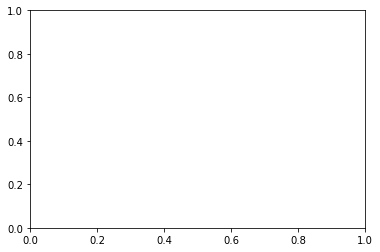

In [ ]:
# I ran the dataset earlier when it would load (a week ago) and the graph showed it was ideal to have 21 topics.
plt.plot(topic_nums, coherence_scores)
plt.title('Coherence as a Function of Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.grid
plt.show

In [ ]:
emails_topics['tokens_count'] = emails_topics.body.str.len() # Count tokens per email 
emails_topics.sort_values(by=['tokens_count'], ascending = False, inplace = True)
emails_topics.head(20)

,Unnamed: 0,paper_id,source,title,abstract,authors,journal,publish_year,body,body2,...,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,max_proportion,max_topic,tokens_count
916,44,146aec059a8c804b8970d16f43b6313b52e6c8e0,Elsevier,Electrochemical biosensors for pathogen detection,Abstract Recent advances in electrochemical bi...,"Cesewski, Ellen; Johnson, Blake N.",Biosensors and Bioelectronics,2020,Pathogens are infectious agents that cause dis...,Pathogens are infectious agents that cause dis...,...,0.134493,0.092125,0.066090,0.111834,0.106752,0.070095,0.134407,0.134493,topic_4,111430
15,417,1f45ec61909c4000fcb61fe05fd8f47dd1fba208,Elsevier,An approach to the photocatalytic mechanism in...,Abstract The approach of this timely review co...,"Rodríguez-González, Vicente; Obregón, Sergio; ...",Applied Catalysis B: Environmental,2020,"In the last decades, several advanced oxidatio...","In the last decades, several advanced oxidatio...",...,0.134490,0.082324,0.068481,0.129287,0.049428,0.062676,0.122698,0.134490,topic_4,104724
342,885,f39a2f9ad39c94a1acaa2e62717165a7970be1f9,biorxiv,A molecular cell atlas of the human lung from ...,Although single cell RNA sequencing studies ha...,Kyle J Travaglini; Ahmad N Nabhan; Lolita Penl...,NaN,2019,"Over the past two centuries, hundreds of human...","Over the past two centuries, hundreds of human...",...,0.135080,0.112407,0.085773,0.056620,0.080204,0.086900,0.096026,0.135080,topic_4,78961
770,983,0ed3c6a5559cd73307184f51fc53ccc76da559bc,Elsevier,Novel coronavirus disease (Covid-19): The firs...,NaN,"Lillie, Patrick J.; Samson, Anda; Li, Ang; Ada...",Journal of Infection,2020,"In this Journal, Zhu et al. recently reported ...","In this Journal, Zhu et al. recently reported ...",...,0.148228,0.099603,0.106029,0.109370,0.077180,0.084284,0.124684,0.148228,topic_4,76592
405,367,64d626397d4df936403abcf0fa37e8e78b4f663f,medrxiv,A prototype for decision support tool to help ...,The primary objective of this work is to model...,Anatoly Zhigljavsky; Ivan Fesenko; Henry Wynn;...,NaN,2020,The primary objective of this work is to model...,The primary objective of this work is to model...,...,0.082438,0.115511,0.095233,0.079990,0.105773,0.125236,0.050278,0.161054,topic_1,74015
818,779,5aaf4d1bf7972637b837178f999fd3ba8bf38fce,Elsevier,The anti-viral facet of anti-rheumatic drugs: ...,Abstract The outbreak of the severe acute resp...,"Perricone, Carlo; Triggianese, Paola; Bartolon...",Journal of Autoimmunity,2020,The outbreak of the 2019-coronavirus (SARS-CoV...,The outbreak of the -coronavirus (SARS-CoV-) h...,...,0.115765,0.125264,0.120413,0.131808,0.066028,0.085722,0.128684,0.131808,topic_7,70697
490,618,45203a59571409cbe1d3c021f005948d906547cd,arxiv,WeTrace -- A Privacy-preserving Mobile COVID-1...,For the protection of people and society again...,A. Carli De; M. Franco; A. Gassmann; C. Killer...,NaN,2020,Social distancing is one of the essential meas...,Social distancing is one of the essential meas...,...,0.132316,0.093791,0.097994,0.092448,0.089998,0.096908,0.089414,0.132316,topic_4,66065
314,175,a0f7ec544573a9e71f58dbb6248315fb8017da67,Elsevier,Small Mammals Common Surgical Procedures of Ro...,Small mammal surgical procedures are a part of...,"Miwa, Yasutsugu; Sladky, Kurt K.",Veterinary Clinics of North America: Exotic An...,2016,sterilized cling wrap is useful as a transpare...,sterilized cling wrap is useful as a transpare...,...,0.131973,0.088650,0.091037,0.122704,0.104624,0.063288,0.135743,0.135743,topic_10,65578
409,832,e6c21aa56e844647e941a19470da267b388d0b8d,arxiv,Modeling Epidemic Spreading through Public Tra...,Passenger contact in public transit (PT) netwo...,Baichuan Mo; Kairui Feng; Yu Shen; Clarence Ta...,NaN,2020,Infectious diseases spread through social cont...,Infectious diseases spread through social cont...,...,0.119190,0.071404,0.062534,0.115258,0.082707,0.102119,0.070736,0.145508,topic_1,63395
559,81,8344889387ee430ad030c1e27e0b6414062c7938,medrxiv,COVID-19 outbreak in G

In [ ]:
article = (emails_topics.loc[995]['body'])
print(article)

Influenza Like illnesses cases are defined as cases with fever of sudden onset (>39°C) with respiratory signs (cough, running nose) and myalgia of any age. Acute Respiratory Infection (AIR) include diseases with respiratory signs and are only monitored in the > 65 y.o. Cases are reported in real time by participating GPs (approx. 600 GPs) all over France. Additionally, Sentinelles GPs may swab 1 ILI case and up to 2 IRA cases per week for viral characterization (3) . Influenza virus, respiratory syncytial virus, human rhinovirus and human metapneumovirus are routinely looked for, and SARS-CoV-2 has been added since February 2020.
We computed the expected number of ILI consultations using the superposition of a seasonal (4) and an influenza epidemic component (5) , as detailed in the appendix. Excess cases were computed as the difference between observed cases and expected numbers. The rate of increase in excess cases was determined, assuming exponential growth.
Confirmed COVID19 cases 

In [ ]:
# TF IDF summary sentences

In [ ]:
# Tokenize at the sentence level
sentences = sent_tokenize(article)
sentences

['Influenza Like illnesses cases are defined as cases with fever of sudden onset (>39°C) with respiratory signs (cough, running nose) and myalgia of any age.',
 'Acute Respiratory Infection (AIR) include diseases with respiratory signs and are only monitored in the > 65 y.o.',
 'Cases are reported in real time by participating GPs (approx.',
 '600 GPs) all over France.',
 'Additionally, Sentinelles GPs may swab 1 ILI case and up to 2 IRA cases per week for viral characterization (3) .',
 'Influenza virus, respiratory syncytial virus, human rhinovirus and human metapneumovirus are routinely looked for, and SARS-CoV-2 has been added since February 2020.',
 'We computed the expected number of ILI consultations using the superposition of a seasonal (4) and an influenza epidemic component (5) , as detailed in the appendix.',
 'Excess cases were computed as the difference between observed cases and expected numbers.',
 'The rate of increase in excess cases was determined, assuming exponentia

In [ ]:
vectorizer = TfidfVectorizer() 
words_tfidf = vectorizer.fit_transform(sentences)
words_tfidf

<41x358 sparse matrix of type '<class 'numpy.float64'>'
	with 713 stored elements in Compressed Sparse Row format>

In [ ]:
num_summ_sentences = 3

In [ ]:
sentences_sum = words_tfidf.sum(axis = 1)
summary_sentences = np.argsort(sentences_sum, axis = 0)[:: -1]

In [ ]:
for i in range(0, len(sentences)):
    if i in summary_sentences[:num_summ_sentences]:
        print(sentences[i])

In the last 30 seasons of routine surveillance in France with the Sentinelles network, this is the first time that an increase in ILI cases is observed simultaneously in several regions after the peak of the annual influenza epidemic.
As information regarding the coronavirus risk is widespread, a uniform increase over all regions could have been expected in this scenario, but we acknowledge that it may have led to increased consultation rates in regions where COVID19 is the most reported.
As we enter a period of generalized circulation of the SARS-CoV-2 virus, surveillance based on clinical description and swabbing by GPs will prove essential to help us assess the situation.


In [ ]:
# LSA

In [ ]:
language = "english"
stemmer = Stemmer(language)
parser = PlaintextParser.from_string(article, Tokenizer(language))

In [ ]:
summarizer_lsa = LsaSummarizer(stemmer)
summarizer_lsa.stop_words = get_stop_words(language)

In [ ]:
for sentence in summarizer_lsa(parser.document, num_summ_sentences):
    print(str(sentence))

In the last 30 seasons of routine surveillance in France with the Sentinelles network, this is the first time that an increase in ILI cases is observed simultaneously in several regions after the peak of the annual influenza epidemic.
The current situation with COVID19 may change the health-seeking behaviour of patients and, to some extent, of the contributing general practitioners although they conform to a case definition.
As we enter a period of generalized circulation of the SARS-CoV-2 virus, surveillance based on clinical description and swabbing by GPs will prove essential to help us assess the situation.


In [ ]:
# TextRank

In [ ]:
summarizer_tr = TextRankSummarizer(stemmer)
summarizer_tr.stop_words = get_stop_words(language)

In [ ]:
for sentence in summarizer_tr(parser.document, num_summ_sentences):
    print(str(sentence))

NameError: name 'summarizer_tr' is not defined

In [ ]:
# I can't get the last summary method to work, TextRank. I could not get sentence_transformer to import earlier.

In [ ]:
# I prefer the LSA summary method over the TF IDF summary method. There was only 1 sentence (the middle one) that
# was different in each summary. The LSA middle sentence gave a statement that described the potential behavior 
# of patients, which I thought was neat. This was almost like a prediction, where as the TFIDF middle sentence
# provided information that I thought was less pertinent for a acute summary. 

In [ ]:
# testing other word cleaning processes. These are the processes types that I did not ultimately choose.

In [ ]:
# LDA

In [ ]:
model_lda = LdaModel(vectors_gensim, num_topics = 10, 
                     id2word = dictionary, eval_every = 10, random_state = 42, minimum_probability = 0)

In [ ]:
topics_lda = pd.DataFrame(model_lda.show_topics())
topics_lda = topics_lda[1].str.split('+', n = 10, expand = True)
topics_lda = topics_lda.replace(r'\d', '', regex=True)
topics_lda = topics_lda.replace(r'\*', '', regex=True)
topics_lda = topics_lda.replace(r'\"', '', regex=True)
topics_lda = topics_lda.replace(r'\.', '', regex=True)
topics_lda.columns = ['word_1', 'word_2', 'word_3', 'word_4', 'word_5',
                      'word_6', 'word_7', 'word_8', 'word_9', 'word_10']
topics_lda = topics_lda.transpose()
topics_lda.columns = ['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5',
                      'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10']

topics_lda

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
word_1,preprint,preprint,preprint,preprint,preprint,preprint,preprint,preprint,preprint,preprint
word_2,medrxiv,model,license,license,medrxiv,ace,medrxiv,medrxiv,license,medrxiv
word_3,license,medrxiv,medrxiv,medrxiv,license,license,license,license,medrxiv,license
word_4,model,cov,patients,ace,perpetuity,cov,epidemic,patients,ncov,patients
word_5,perpetuity,license,cov,model,granted,medrxiv,patients,perpetuity,cov,model
word_6,granted,patients,perpetuity,funder,display,fig,hcws,granted,patients,bcg
word_7,funder,sars,nd,perpetuity,funder,patients,model,display,perpetuity,epidemic
word_8,cov,ace,cc,copyright,copyright,lockdown,ace,holder,sars,growth
word_9,copyright,viral,granted,holder,holder,sars,pediatric,funder,granted,hcq
word_10,display,perpetuity,holder,cov,author,epidemic,cov,model,care,granted


In [ ]:
# This is slightly different from the topics that NMF generated. The further down the rows you read, the more difference in
# topics that appear. This means that the most common words apepar the most frequently in both.

In [ ]:
# end of LDA

In [ ]:
# begginning of % filtering stopword preprocessing technique

In [ ]:
# Extract message body
def body(messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get_payload())
    return column

# Apply it
emails2['body'] = body(emails2['body_text'])

In [ ]:
# dropping old column
emails2 = emails2.drop(['body_text'], axis=1)

In [ ]:
# cleaning text data
emails2['body2'] = emails2['body'].str.replace(r'\d', '', regex=True)

In [ ]:
# tokenizing
re_tokenizer = RegexpTokenizer("[\\w']+")
emails2['body_cleaned'] = emails2['body2'].apply(re_tokenizer.tokenize)

In [ ]:
digits = string.digits 
punc = string.punctuation + '--' 

emails2['body_cleaned'] = emails2['body_cleaned'].apply(lambda x: [word.lower() for word in x])
emails2['body_cleaned'] = emails2['body_cleaned'].apply(lambda x: [word for word in x if word not in digits]) 
emails2['body_cleaned'] = emails2['body_cleaned'].apply(lambda x: [word for word in x if word not in punc])
emails2['body_cleaned'] = emails2['body_cleaned'].apply(lambda x: [word for word in x if len(word)>1]) # Drops single-letter tokens

In [ ]:
dictionary2 = Dictionary(emails2['body_cleaned'])

In [ ]:
# Creates a list of stopwords from percentages. Any word that appears more than 70% and and word that appears less than 5
# occurences becomes a stop word and will be subsequently filtered (dropped) rather than using an NLTK or Spacy pre-made list.
dictionary2.filter_extremes(no_below=5, no_above=0.7)

In [ ]:
# finding frequency of tokens
# This shows that there are a lot of words leftover after the filtering process that would generally be considered 'stopwords'.
# Therefore, this was a poor method of preprocessing the text.
counter = Counter()
emails2['body_cleaned'].map(counter.update)
most_freq = pd.DataFrame(counter.most_common()) # Or add number within parens to list only x most common
most_freq.columns = ['token', 'count']
most_freq.head(50)

,token,count
0,the,149253
1,of,84151
2,and,67784
3,in,55997
4,to,53585
5,is,30662
6,for,29003
7,with,21509
8,that,19511
9,as,16683


In [ ]:
# end of % stop word preprocessing technique

In [ ]:
# in this method I used spacy and lemmatized the words where as I did not lemmatize or stem the words in my selected method.

In [ ]:
def body(messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get_payload())
    return column

emails2['body'] = body(emails2['body_text'])

In [ ]:
emails2 = emails2.drop(['body_text'], axis=1)

In [ ]:
emails2['body_cleaned'] = emails2['body'].apply(word_tokenize) 

In [ ]:
emails2['body_cleaned'] = emails2['body_cleaned'].apply(lambda x: [word.lower() for word in x])

In [ ]:
stopwords_nltk = set(nltk.corpus.stopwords.words('english'))
emails2['body_cleaned'] = emails2['body_cleaned'].apply(lambda x: [word for word in x if word not in stopwords_nltk])

In [ ]:
punc = string.punctuation + '--' # Add characters as necessary 
emails2['body_cleaned'] = emails2['body_cleaned'].apply(lambda x: [word for word in x if word not in punc])

digits = string.digits 
emails2['body_cleaned'] = emails2['body_cleaned'].apply(lambda x: [word for word in x if word not in digits])

In [ ]:
stemmer = SnowballStemmer('english')
emails2['body_stemmed'] = emails2['body_cleaned'].apply(lambda x: [stemmer.stem(word) for word in x])
emails2.head(3)

,Unnamed: 0,paper_id,source,title,abstract,authors,journal,publish_year,body,body_cleaned,body_stemmed
841,841,6b96c2ef257f66c4eeb87ed65f06dff989703568,medrxiv,Study of Epidemiological Characteristics and I...,"After SARS-CoV-2 set foot in India, the Indian...",Archisman Mazumder; Mehak Arora; Vishwesh Bhar...,NaN,2020,"In December 2019, a cluster of patients with p...","[december, 2019, cluster, patients, pneumonia,...","[decemb, 2019, cluster, patient, pneumonia, un..."
956,956,afe457e80dfa89c356d2951d66c3a52c8e4edc70,Elsevier,SARS-CoV-2 and the testis: similarity with oth...,Abstract Since the start of the latest coronav...,"Cardona Maya, Walter D.; Du Plessis, Stefan S....",Reproductive BioMedicine Online,2020,S ince the novel coronavirus (SARS-CoV-2) outb...,"[ince, novel, coronavirus, sars-cov-2, outbrea...","[inc, novel, coronavirus, sars-cov-2, outbreak..."
544,544,95bd7b80fc057fe933c91325ec5d65dae385b3da,medrxiv,SIR-simulation of Corona pandemic dynamics in ...,"The SIR (susceptible-infected-removed) model, ...",Igor Nesteruk,NaN,2020,7697 199 All rights reserved. No reuse allowed...,"[7697, 199, rights, reserved, reuse, allowed, ...","[7697, 199, right, reserv, reus, allow, withou..."


In [ ]:
lemmatizer = WordNetLemmatizer()
emails2['body_lemmatized'] = emails2['body_cleaned'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
emails2.head(3)

,Unnamed: 0,paper_id,source,title,abstract,authors,journal,publish_year,body,body_cleaned,body_stemmed,body_lemmatized
841,841,6b96c2ef257f66c4eeb87ed65f06dff989703568,medrxiv,Study of Epidemiological Characteristics and I...,"After SARS-CoV-2 set foot in India, the Indian...",Archisman Mazumder; Mehak Arora; Vishwesh Bhar...,NaN,2020,"In December 2019, a cluster of patients with p...","[december, 2019, cluster, patients, pneumonia,...","[decemb, 2019, cluster, patient, pneumonia, un...","[december, 2019, cluster, patient, pneumonia, ..."
956,956,afe457e80dfa89c356d2951d66c3a52c8e4edc70,Elsevier,SARS-CoV-2 and the testis: similarity with oth...,Abstract Since the start of the latest coronav...,"Cardona Maya, Walter D.; Du Plessis, Stefan S....",Reproductive BioMedicine Online,2020,S ince the novel coronavirus (SARS-CoV-2) outb...,"[ince, novel, coronavirus, sars-cov-2, outbrea...","[inc, novel, coronavirus, sars-cov-2, outbreak...","[ince, novel, coronavirus, sars-cov-2, outbrea..."
544,544,95bd7b80fc057fe933c91325ec5d65dae385b3da,medrxiv,SIR-simulation of Corona pandemic dynamics in ...,"The SIR (susceptible-infected-removed) model, ...",Igor Nesteruk,NaN,2020,7697 199 All rights reserved. No reuse allowed...,"[7697, 199, rights, reserved, reuse, allowed, ...","[7697, 199, right, reserv, reus, allow, withou...","[7697, 199, right, reserved, reuse, allowed, w..."


In [ ]:
tokens = emails2['body'].apply(word_tokenize) 
print(len(tokens.explode())) # Total number of tokens
print(len(set(tokens.explode())))

2773583
73970


In [ ]:
# counter
counter = Counter()
emails2['body_cleaned'].map(counter.update)
most_freq = pd.DataFrame(counter.most_common()) # Or add number within parens to list only x most common
most_freq.columns = ['token', 'count']
most_freq.dtypes

token    object
count     int64
dtype: object

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token')]

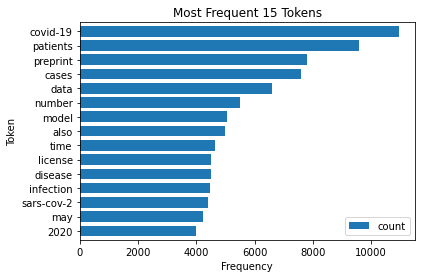

In [ ]:
# bar plot
# This ranking is different from my selected method. I found both methods useful, though I thought that the method I
# selected was more sensible. 
barh_plot = most_freq.head(15).plot.barh(x = 'token', y = 'count',  width = 0.75, title = 'Most Frequent 15 Tokens') 
barh_plot.invert_yaxis() # Puts largest at top of y axis
barh_plot.set(xlabel = 'Frequency', ylabel = 'Token')

In [ ]:
emails2['body_cleaned_string'] = [' '.join(map(str, l)) for l in emails2['body_cleaned']]


In [ ]:
spacy_model = spacy.load("en_core_web_sm")

In [ ]:
# Spacy
sample = spacy_model(emails2.body_cleaned_string[956]) 
sample

ince novel coronavirus sars-cov-2 outbreak december 2019 number cases infected individuals increasing exponentially leading coronavirus disease declared global pandemic 11 march 2020 rothe collaborators rothe et al 2020 first report male acquired infection transmission appears occurred incubation period index patient present symptoms stage case raises questions possible new routes transmission evidence relationship members coronavirus family orchitis humans sars-cov xu et al 2006 cats feline coronavirus sigurðardóttir et al 2001 however whether virus present testicular epithelium remains matter debate due conflicting results zhao et al 2003 ding et al 2004 gu et al 2005 xu et al 2006 testicular damage germ cell destruction clearly observed cases xu et al 2006 unreasonable believe sars-cov-2 could transmitted semen potentially providing possible route transmission pathogen could occur asymptomatic patients patients mild symptoms even incubation period potential route transmission propos

In [ ]:
for token in sample[0:10]:
    print (token.text, token.pos_) 
    sample = spacy_model(emails2.body_cleaned_string[956]) 
sample

ince VERB
novel NOUN
coronavirus PROPN
sars PROPN
- PUNCT
cov-2 NOUN
outbreak NOUN
december PROPN
2019 NUM
number NOUN


ince novel coronavirus sars-cov-2 outbreak december 2019 number cases infected individuals increasing exponentially leading coronavirus disease declared global pandemic 11 march 2020 rothe collaborators rothe et al 2020 first report male acquired infection transmission appears occurred incubation period index patient present symptoms stage case raises questions possible new routes transmission evidence relationship members coronavirus family orchitis humans sars-cov xu et al 2006 cats feline coronavirus sigurðardóttir et al 2001 however whether virus present testicular epithelium remains matter debate due conflicting results zhao et al 2003 ding et al 2004 gu et al 2005 xu et al 2006 testicular damage germ cell destruction clearly observed cases xu et al 2006 unreasonable believe sars-cov-2 could transmitted semen potentially providing possible route transmission pathogen could occur asymptomatic patients patients mild symptoms even incubation period potential route transmission propos

In [ ]:
# noun POS
nouns = [token for token in sample if token.pos_ in ['NOUN', 'PROPN']]
print (nouns)

[novel, coronavirus, sars, cov-2, outbreak, december, number, cases, individuals, coronavirus, disease, march, collaborators, et, al, report, male, infection, transmission, incubation, period, index, patient, symptoms, stage, case, questions, routes, transmission, evidence, relationship, members, coronavirus, family, orchitis, humans, sars, cov, xu, et, al, coronavirus, et, al, virus, epithelium, matter, debate, results, zhao, et, al, ding, et, al, gu, et, al, xu, et, al, damage, germ, cell, destruction, cases, xu, et, al, unreasonable, sars, cov-2, semen, route, transmission, pathogen, patients, symptoms, incubation, period, route, transmission, infections, ebola, cardona, maya, et, al, 2019, zika, cardona, maya, et, al, feldmann, angiotensin, enzyme, ace2, receptors, mediate, entry, sars, cov-2, cells, datasets, fan, colleagues, fan, et, al, ace2, leydig, cells, tubules, testis, virus, ace2, cells, alteration, tissue, sites, infection, concern, coronavirus, outbreak, impact, fertilit

In [ ]:
# chunks
sample_nounchunks = list(sample.noun_chunks)
print(sample_nounchunks)

[novel coronavirus sars-cov-2, outbreak december 2019 number cases, exponentially leading coronavirus disease, 11 march 2020 rothe collaborators, et al 2020 first report, male, incubation period index patient present symptoms stage case, questions, possible new routes transmission evidence relationship members, sars-cov xu, al, feline coronavirus, al, virus, matter debate, due conflicting results, et al, xu et al 2006 testicular damage germ cell destruction, cases, xu et al 2006 unreasonable, sars-cov-2, semen, possible route transmission pathogen, mild symptoms, even incubation period potential route transmission, ebola cardona-maya et al 2019 zika viruses cardona maya et al 2016 feldmann, enzyme, one major receptors, mediate entry sars, cov-2, human cells, online datasets, fan colleagues, fan, al, ace2, seminiferous tubules, human testis, thus binding virus ace2-positive cells, severe alteration testicular tissue, sites, viral infection therefore concern recent coronavirus outbreak, 

In [ ]:
docs = list(spacy_model.pipe(emails2.body_cleaned_string))

In [ ]:
# extract spacy functions
def extract_tokens_plus_meta(doc:spacy.tokens.doc.Doc):
    """Extract tokens and metadata from individual spaCy doc."""
    return [
        (i.text, i.i, i.lemma_, i.ent_type_, i.tag_, 
         i.dep_, i.pos_, i.is_stop, i.is_alpha, 
         i.is_digit, i.is_punct) for i in doc
    ]

# Iterate across all emails, retaining original doc_id, and store in dataframe
def tidy_tokens(docs):
    """Extract tokens and metadata from list of spaCy docs."""
    
    cols = [
        "doc_id", "token", "token_order", "lemma", 
        "ent_type", "tag", "dep", "pos", "is_stop", 
        "is_alpha", "is_digit", "is_punct"
    ]
    
    meta_df = []
    for ix, doc in enumerate(docs):
        meta = extract_tokens_plus_meta(doc)
        meta = pd.DataFrame(meta)
        meta.columns = cols[1:]
        meta = meta.assign(doc_id = ix).loc[:, cols]
        meta_df.append(meta)
        
    return pd.concat(meta_df)  

In [ ]:
# this is a pretty good method. This was a close 2nd in my selection process. It became quite subjective and my decision
# making process became more intuitive that I had expected. Perhpas I could become more analytical with practice...
spacy_meta = tidy_tokens(docs)
spacy_meta

,doc_id,token,token_order,lemma,ent_type,tag,dep,pos,is_stop,is_alpha,is_digit,is_punct
0,0,december,0,december,DATE,NNP,nmod,PROPN,False,True,False,False
1,0,2019,1,2019,DATE,CD,nummod,NUM,False,False,True,False
2,0,cluster,2,cluster,,NN,compound,NOUN,False,True,False,False
3,0,patients,3,patient,,NNS,compound,NOUN,False,True,False,False
4,0,pneumonia,4,pneumonia,,NN,nmod,NOUN,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
707,49,covid-19,707,covid-19,,NNP,compound,PROPN,False,False,False,False
708,49,pandemic,708,pandemic,,JJ,advmod,ADJ,False,True,False,False
709,49,must,709,must,,MD,aux,AUX,True,True,False,False
710,49,ensure,710,ensure,,VB,conj,VERB,False,True,False,False


In [ ]:
# selecting for nouns
nouns = spacy_meta[spacy_meta['pos'] == 'NOUN']
nouns

,doc_id,token,token_order,lemma,ent_type,tag,dep,pos,is_stop,is_alpha,is_digit,is_punct
2,0,cluster,2,cluster,,NN,compound,NOUN,False,True,False,False
3,0,patients,3,patient,,NNS,compound,NOUN,False,True,False,False
4,0,pneumonia,4,pneumonia,,NN,nmod,NOUN,False,True,False,False
6,0,origin,6,origin,,NN,nsubj,NOUN,False,True,False,False
11,0,agent,11,agent,,NN,nsubj,NOUN,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
695,49,staff,695,staff,,NN,dobj,NOUN,False,True,False,False
700,49,need,700,need,,NN,compound,NOUN,False,True,False,False
701,49,research,701,research,,NN,compound,NOUN,False,True,False,False
702,49,community,702,community,,NN,nsubj,NOUN,False,True,False,False


In [ ]:
# freq. count of nouns
# this would have been a potentially even more filtered out list of tokens.
nouns_count = pd.DataFrame(nouns.groupby(['token']).size())
nouns_count.columns = ['count']
nouns_count = nouns_count.sort_values(by=['count'], ascending = False)
nouns_count['count'] = pd.to_numeric(nouns_count['count'])
nouns_count

,count
token,
cases,478
data,399
number,396
patients,388
preprint,369
...,...
blebs,1
mediates,1
mediator,1


In [ ]:
# end of emails2